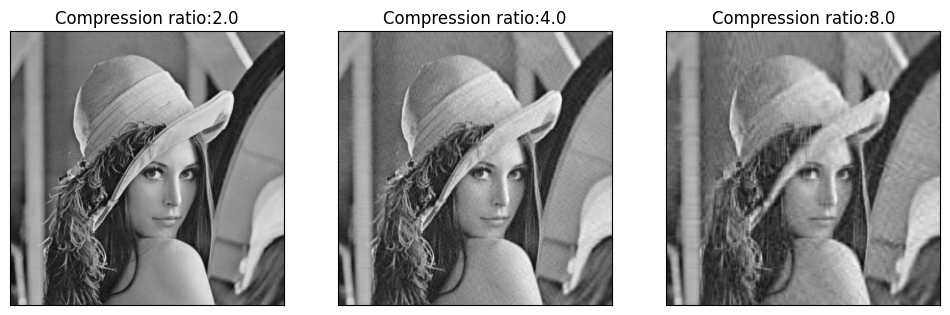

In [1]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
 X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
for i, r in enumerate(q):
 Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
 ax[i].imshow(Xq, cmap = 'gray') 
 ax[i].set_title('Compression ratio:{}'.format(p/r/2)) 
 ax[i].set_xticks([])
 ax[i].set_yticks([]) 
plt.show()

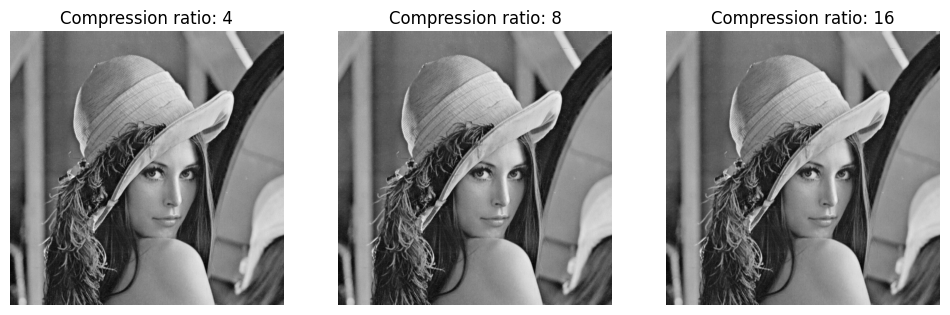

In [11]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# 定義函數來切割小圖
def extract_patches(image, patch_size):
    patches = []
    height, width = image.shape
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return patches

# 讀取圖像
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
image = mpimg.imread(imgfile)

# 轉換為灰度圖
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# 切割小圖
patch_size = 8
patches = extract_patches(image, patch_size)

# 將每個小圖拉成 64x1 的向量
patch_vectors = [patch.flatten() for patch in patches]

# 重組成新的 64xN 矩陣
new_matrix = np.vstack(patch_vectors)

# 奇異值分解
U, E, VT = svd(new_matrix, full_matrices=False)

# 指定壓縮比率
compress_ratios = [4, 8, 16]

fig, ax = plt.subplots(1, len(compress_ratios), figsize=(12, 4))

for i, ratio in enumerate(compress_ratios):
    # 指定近似的Rank
    q = int(image.shape[1] / ratio)
    approx_matrix = np.dot(U[:, :q], np.dot(np.diag(E[:q]), VT[:q, :]))

    # 將重組的矩陣切分回小圖
    reconstructed_image = np.zeros_like(image)
    index = 0
    for m in range(0, reconstructed_image.shape[0], patch_size):
        for n in range(0, reconstructed_image.shape[1], patch_size):
            reconstructed_image[m:m+patch_size, n:n+patch_size] = approx_matrix[index].reshape(patch_size, patch_size)
            index += 1

    ax[i].imshow(reconstructed_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(ratio))
    ax[i].axis('off')

plt.show()


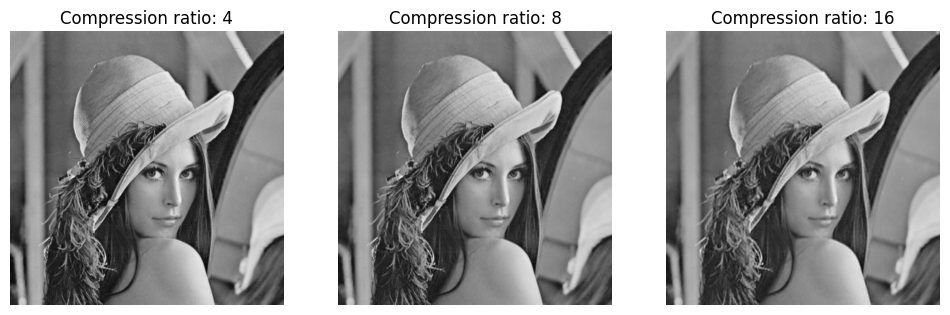

In [12]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# 定義函數來切割小圖
def extract_patches(image, patch_size):
    patches = []
    height, width = image.shape
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return patches

# 讀取圖像
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
image = mpimg.imread(imgfile)

# 轉換為灰度圖
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# 切割小圖
patch_size = 16
patches = extract_patches(image, patch_size)

# 將每個小圖拉成 256x1 的向量
patch_vectors = [patch.flatten() for patch in patches]

# 重組成新的 256xN 矩陣
new_matrix = np.vstack(patch_vectors)

# 奇異值分解
U, E, VT = svd(new_matrix, full_matrices=False)

# 指定壓縮比率
compress_ratios = [4, 8, 16]

fig, ax = plt.subplots(1, len(compress_ratios), figsize=(12, 4))

for i, ratio in enumerate(compress_ratios):
    # 指定近似的Rank
    q = int(image.shape[1] / ratio)
    approx_matrix = np.dot(U[:, :q], np.dot(np.diag(E[:q]), VT[:q, :]))

    # 將重組的矩陣切分回小圖
    reconstructed_image = np.zeros_like(image)
    index = 0
    for m in range(0, reconstructed_image.shape[0], patch_size):
        for n in range(0, reconstructed_image.shape[1], patch_size):
            reconstructed_image[m:m+patch_size, n:n+patch_size] = approx_matrix[index].reshape(patch_size, patch_size)
            index += 1

    ax[i].imshow(reconstructed_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(ratio))
    ax[i].axis('off')

plt.show()


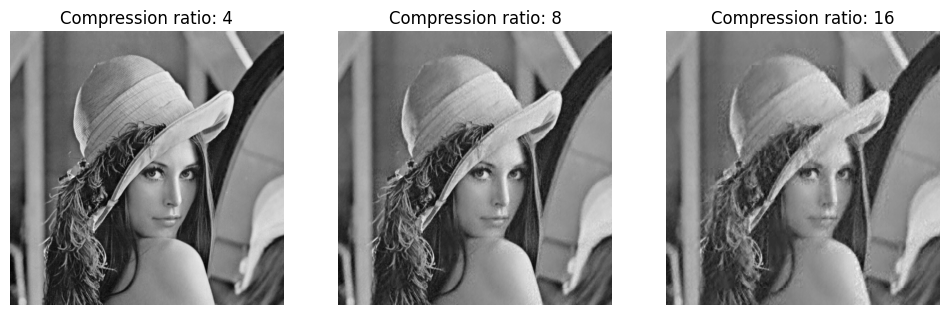

In [13]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# 定義函數來切割小圖
def extract_patches(image, patch_size):
    patches = []
    height, width = image.shape
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return patches

# 讀取圖像
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
image = mpimg.imread(imgfile)

# 轉換為灰度圖
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# 切割小圖
patch_size = 32
patches = extract_patches(image, patch_size)

# 將每個小圖拉成 1024x1 的向量
patch_vectors = [patch.flatten() for patch in patches]

# 重組成新的 1024xN 矩陣
new_matrix = np.vstack(patch_vectors)

# 奇異值分解
U, E, VT = svd(new_matrix, full_matrices=False)

# 指定壓縮比率
compress_ratios = [4, 8, 16]

fig, ax = plt.subplots(1, len(compress_ratios), figsize=(12, 4))

for i, ratio in enumerate(compress_ratios):
    # 指定近似的Rank
    q = int(image.shape[1] / ratio)
    approx_matrix = np.dot(U[:, :q], np.dot(np.diag(E[:q]), VT[:q, :]))

    # 將重組的矩陣切分回小圖
    reconstructed_image = np.zeros_like(image)
    index = 0
    for m in range(0, reconstructed_image.shape[0], patch_size):
        for n in range(0, reconstructed_image.shape[1], patch_size):
            reconstructed_image[m:m+patch_size, n:n+patch_size] = approx_matrix[index].reshape(patch_size, patch_size)
            index += 1

    ax[i].imshow(reconstructed_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(ratio))
    ax[i].axis('off')

plt.show()


切割大小與影像清晰度之間存在密切的關係。切割大小決定了圖像在處理過程中的細節程度和信息量。以下是切割大小與影像清晰度之間的關係：

切割大小過大：如果切割大小過大，將導致每個小塊包含的信息量減少，進而導致影像的細節丟失。這可能會導致影像失真和模糊，因為過大的切割大小會導致無法捕捉到影像中的細微細節和特徵。
切割大小適中：適中的切割大小能夠在保持影像清晰度的同時有效地處理圖像。這樣的切割大小可以保留足夠的細節和信息，同時還能夠提高計算效率。通常，切割大小應該根據影像的大小、特徵和需要處理的任務來選擇。
切割大小過小：如果切割大小過小，將導致產生大量的小塊，這可能會增加計算成本並且容易受到噪音的影響。同時，過小的切割大小可能會使得圖像處理過程中遺失一些整體特徵，從而降低影像的清晰度和品質。
總的來說，切割大小應該根據具體應用場景和需求來選擇，以平衡影像清晰度、計算效率和處理複雜度。







In [1]:
import numpy as np 
import scipy.io
D = scipy.io.loadmat('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image y = np.ndarray.flatten(D[’nfaces’])
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/4091507806.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m']) # 168
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/4091507806.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n']) # 192
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/4091507806.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_persons = int(D['person']) # 38


讀取資料

In [13]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os

def show_montage(X, n, m, h, w):
    '''
    X: 影像資料矩陣，每行代表一張影像
    n,m: 每張影像的大小 nxm
    h,w: 建立一個蒙太奇圖陣，大小 figsize=(w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: 
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

D = scipy.io.loadmat('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image y = np.ndarray.flatten(D[’nfaces’])
y = np.ndarray.flatten(D['nfaces'])#分別代表每個人的張數
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38



/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/556466939.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m']) # 168
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/556466939.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n']) # 192
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_80979/556466939.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_persons = int(D['person']) # 38


顯示38個人

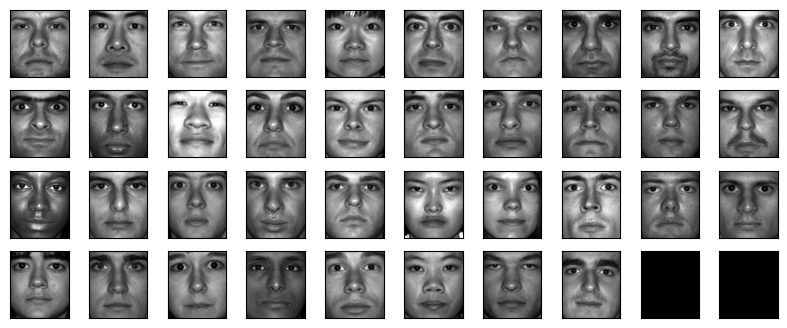

In [14]:
all_diff_persons = np.zeros((m*n, n_persons)) 
cnt = 0
for i in range(n_persons):
   all_diff_persons[:,i] = X[:,cnt] 
   cnt = cnt + y[i]
show_montage(all_diff_persons, n, m, 4,10)

顯示某個人的所有樣本影像

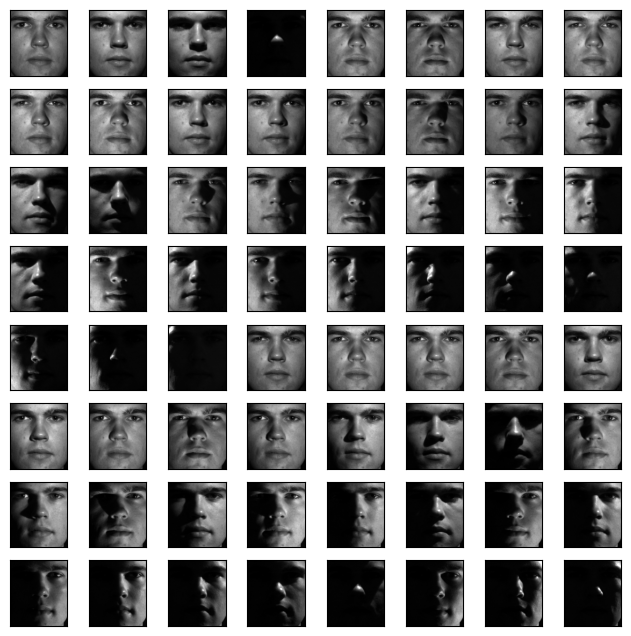

In [19]:
which_person = 18 ##指定第幾個人
start_col = y[0:which_person].sum()
end_col = start_col + y[which_person]
show_montage(X[:,start_col:end_col], n, m, 8, 8)

ＳＶＤ

In [20]:
from numpy.linalg import svd

avgFace = np.mean(X, axis=1)
X_avg = X - avgFace.reshape(-1, 1)

U, E, VT = svd(X, full_matrices=False)

範例2

展示 the basis of eigenfaces

組成人臉影像的基底向量

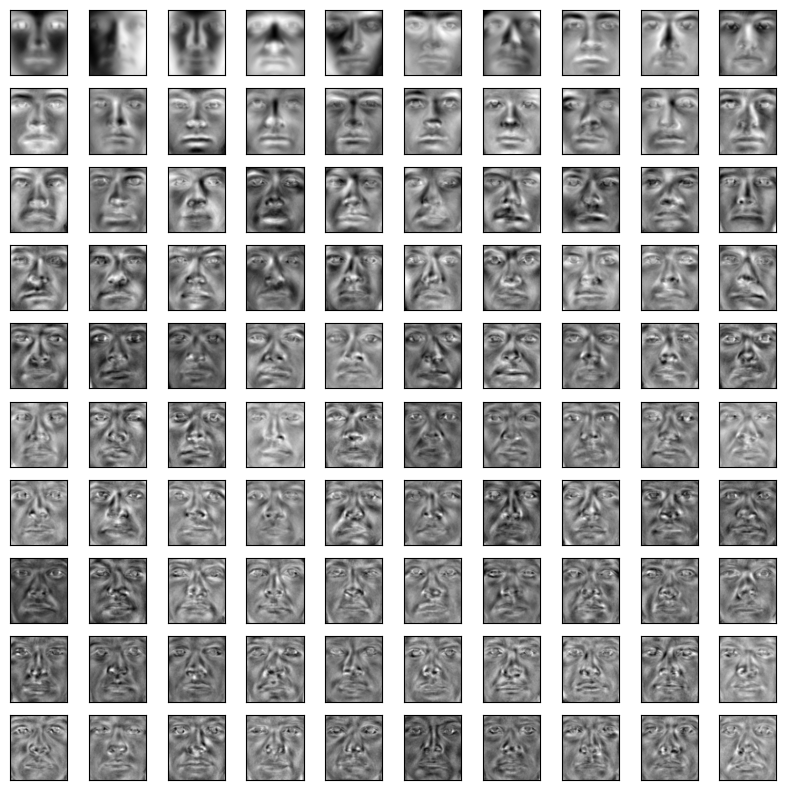

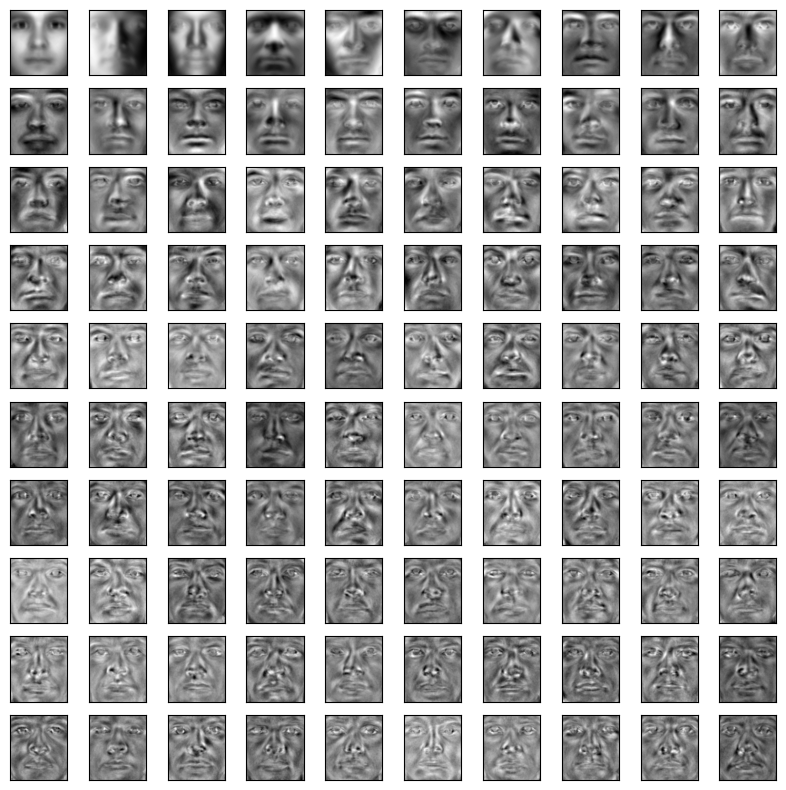

In [22]:
import matplotlib.pyplot as plt

# show the first 36 bases
show_montage(U, n, m, 10, 10) ##show 前100個eigenvector

##左上角的eigenvector為最大的主成分，右下角的eigenvector為最小的eigenvalue
show_montage(255 - U, n, m, 10, 10) ##取一個相反的，255為最大值

範例3

影像壓縮後的還原品質

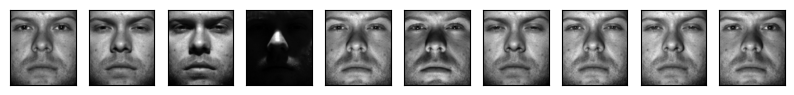

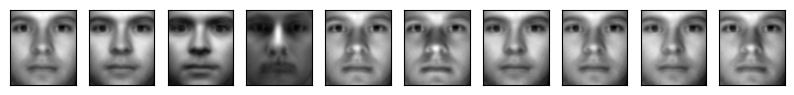

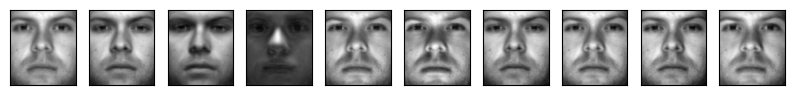

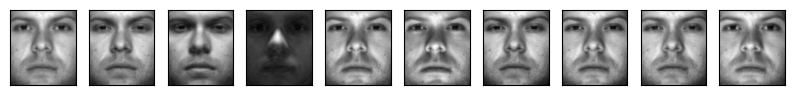

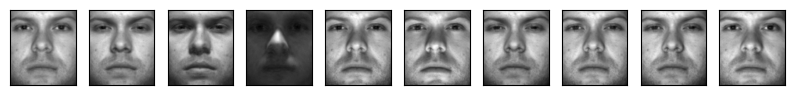

[112.11953731  22.42390746  11.21195373   5.60597687]


In [24]:
h , w = 1 ,10
show_montage(X, n, m, h, w)
q = np.array([20, 100, 200, 400])
for i in q: ##q 取 20, 100, 200, 400
    Uq = U[:, :i]
    Xq = Uq @ ( Uq.T @ X[:, :h*w]) ## Xq = Uq Uq.T @ X
    Xq = Xq + avgFace[:, np.newaxis]
    show_montage(Xq, n, m, h, w)

compress_ratio = (X.shape[0] * X.shape[1]) / (X.shape[0] * q + q + X.shape[1] * q)
print(compress_ratio)

範例4
未加入主成分

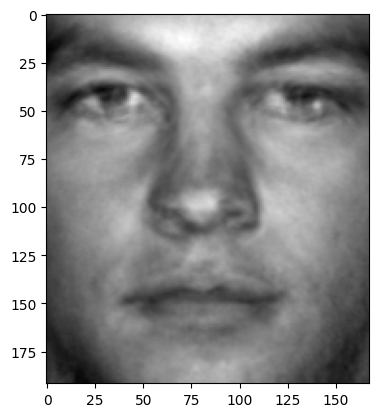

In [49]:
q = 200  #顯示第36張
x_new = X[:, np.sum(y[:36])]
x = U[:, 0:q] @ (U[:, 0:q].T @ x_new)  #avgFace.reshape(-1, 1)
plt.imshow(x.reshape(m, n).T, cmap='gray')
plt.show()

In [39]:
from numpy.linalg import svd

U_BASE = 30 ##取前面30個人做SVD
U, E, VT = svd(X_avg[:, :np.sum(y[:U_BASE])], full_matrices=False)

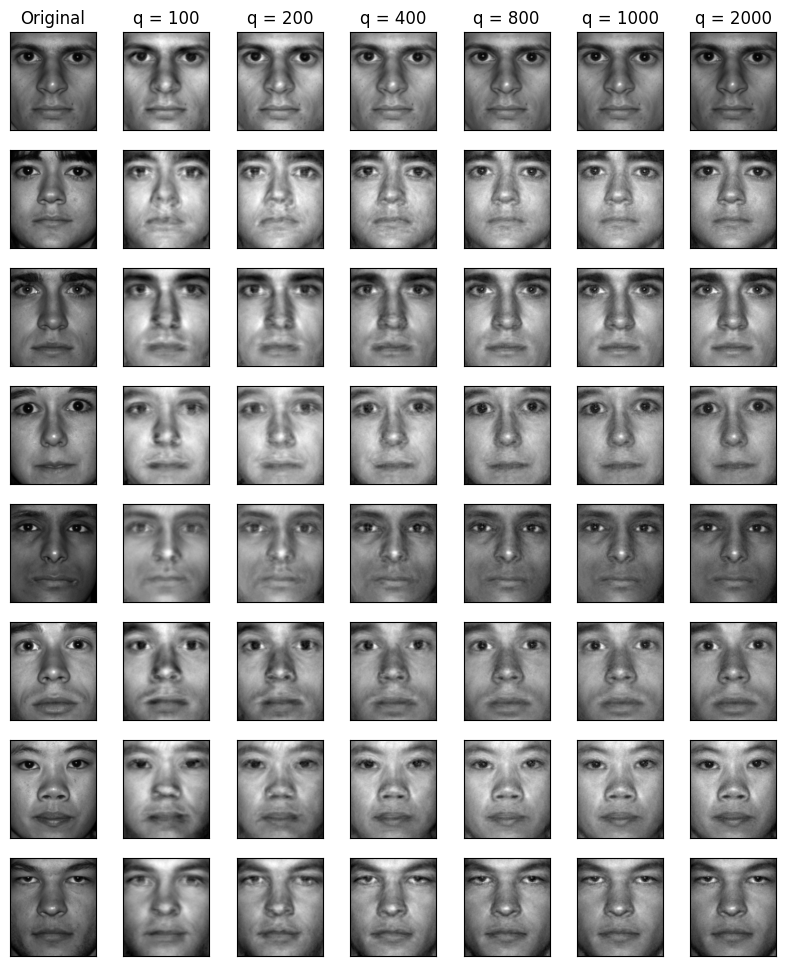

In [46]:
q = np.array([100, 200, 400, 800, 1000, 2000])
new_pic = np.arange(30, 38, 1)

fig , ax = plt.subplots(len(new_pic), len(q) + 1, figsize=(10, 12))

for i in range(len(new_pic)):
  x_new = X[:, np.sum(y[:(new_pic[i]-1)])]
  ax[i, 0].imshow((x_new).reshape(m, n).T, cmap='gray')
  ax[i, 0].set_xticks([])
  ax[i, 0].set_yticks([])
  ax[0][0].set_title('Original')

  for j, r in enumerate(q):
    x = U[:, 0:q[j]] @ (U[:, 0:q[j]].T @ x_new)
    ax[i][j+1].imshow((x).reshape(m ,n).T  , cmap='gray')
    ax[i][j+1].set_xticks([])
    ax[i][j+1].set_yticks([])
    if i == 0:
      ax[i][j+1].set_title('q = {}'.format(q[j]))

plt.show()

##original image  不參與svd

若有參與Ｕ的，加密解密的效果會很好